In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero

Figure 13.1: Energy, distance and reaction scheme for an electron transfer reaction in solution

In [2]:
x_s = np.linspace(-10, 10, 1000)
x_l = np.linspace(-20, 20, 1000)
y_s = 2*x_s**2+90
y_l = 0.75*x_l**2+19

x_c = np.linspace(-1.5, 1.5, 1000)
y_c = 6.8*x_c**2+185
y_c_r = -6.9*x_c**2+149

In [3]:
for i, x in enumerate(x_c):
    x_str = str(x)
    if '0.00' in x_str:
        print(i, x_str)

497 -0.007507507507507505
498 -0.0045045045045044585
499 -0.0015015015015014122
500 0.0015015015015014122
501 0.0045045045045044585
502 0.007507507507507505


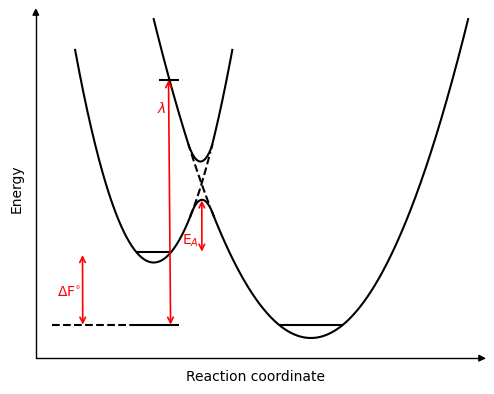

In [4]:
fig = plt.figure(figsize = (5,4))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x_s[:746]+15, y_s[:746], color = 'k')
ax.plot(x_s[756:861]+15, y_s[756:861], color = 'k', ls = '--')
ax.plot(x_s[866:]+15, y_s[866:], color = 'k')
ax.plot(x_l[:116]+35, y_l[:116], color = 'k')
ax.plot(x_l[120:180]+35, y_l[120:180], color = 'k', ls = '--')
ax.plot(x_l[185:]+35, y_l[185:], color = 'k')

ax.plot(x_c+20.95, y_c, color = 'k')
ax.plot(x_c+21.15, y_c_r, color = 'k')

ax.scatter(x_l[50]+35, y_l[50], color = 'k', marker = '_', s = 200)
ax.hlines(y_s[390], x_s[390]+15, x_s[609]+15, color = 'k')
ax.hlines(y_l[400], x_l[400]+35, x_l[599]+35, color = 'k')
ax.hlines(y_l[400], x_s[350]+15, x_s[660]+15, color = 'k')
ax.hlines(y_l[400], 2, x_s[350]+15, color = 'k', ls = '--')

ax.annotate(' ', xy = (x_l[47]+35, y_l[48]), xytext = (x_l[47]+35, y_l[500]-3), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))
ax.annotate(' ', xy = (x_s[47]+15, y_s[390]), xytext = (x_s[35]+15, y_l[500]-3), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))
ax.annotate(' ', xy = (x_c[540]+21, max(y_c_r)+2), xytext = (x_c[450]+21, y_s[390]-15), 
            arrowprops=({'arrowstyle': '<->', 'lw': 1.2, 'color':'r'}))

ax.text(x_s[40]+11.9, y_l[320], r'$\Delta$F$^{\circ}$', color = 'r')
ax.text(x_l[10]+35, y_l[80], r'$\lambda$', color = 'r')
ax.text(x_c[0]+20.1, y_s[300]-15, r'E$_{A}$', color = 'r')

ax.set_xlim(0, 56)
ax.set_ylim(0, 320)

ax.set_ylabel('Energy')
ax.set_xlabel('Reaction coordinate')

plt.tight_layout()
plt.savefig('EDR.png', dpi = 150)
plt.show()

Figure 13.2: Energy profiles for the three cases of an electron transfer reaction in solution

In [5]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./30.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [6]:
x_a = np.linspace(-4.5, 4.5, 1000)
y_a = 0.7*x_a**2

x_b1 = np.linspace(-3.5, 3.5, 1000)
y_b1 = x_b1**2
x_b2 = np.linspace(-5, 5, 1000)
y_b2 = x_b2**2

x_c1 = np.linspace(-4, 4, 1000)
y_c1 = x_c1**2
y_c2 = 1.25*x_b2**2

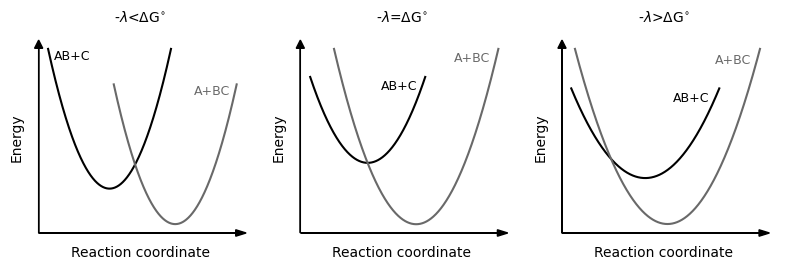

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (8, 2.8))

# [150:851]
axes[0].plot(x_a+5.19, y_a+4.5, color = 'k')
axes[0].plot(x_a+10, y_a+0.9, color = 'dimgrey')
axes[0].text(x_a[50]+5.19, y_a[20]+4.5, 'AB+C', fontsize = 9)
axes[0].text(x_a[950]+10, y_a[980]+0.9, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[0].set_title(r'-$\lambda$<$\Delta$G$^{\circ}$', fontsize = 10)

axes[1].plot(x_b1+4.1, y_b1+10, color = 'k')
axes[1].plot(x_b2+7.05, y_b2+1.25, color = 'dimgrey')
axes[1].text(x_b1[930]+4.1, y_b1[960]+10, 'AB+C', fontsize = 9, ha = 'right')
axes[1].text(x_b2[950]+7.05, y_b2[980]+1.25, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[1].set_title(r'-$\lambda$=$\Delta$G$^{\circ}$', fontsize = 10)

axes[2].plot(x_c1+4.5, y_c1+9.8, color = 'k')
axes[2].plot(x_b2+5.7, y_c2+1.6, color = 'dimgrey')
axes[2].text(x_c1[930]+4.5, y_c1[960]+9.8, 'AB+C', fontsize = 9, ha = 'right')
axes[2].text(x_b2[950]+5.7, y_b2[995]+5.5, 'A+BC', fontsize = 9, color = 'dimgrey', ha = 'right')
axes[2].set_title(r'-$\lambda$>$\Delta$G$^{\circ}$', fontsize = 10)

for ax in axes:
    arrowed_spines(fig, ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Reaction coordinate', labelpad = 0)
    ax.set_ylabel('Energy', labelpad = 0)

plt.tight_layout()
plt.savefig('Eprofile.png', dpi=150)
plt.show()